# Data Augmentation

A common problem , its the amount of data available for the models,for these to present the expected results its necesary that the training occurs with a big amount of data(dataset),but in many ocations we donde have the necesary data for perform this tasks.

This is where the ** Data Augmentation ** technique comes in, which, as its name suggests, allows us to augment our data set in two ways:



* Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, inverting axes ...
* Using different distributions. Example: if we want to train a model to classify high resolution images, we add low resolution images, with noise… always maintaining the highest proportion of high resolution.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

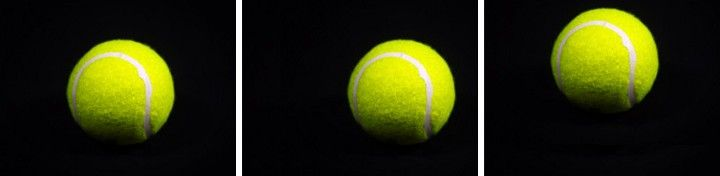



The same ball with some translations



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1. Turn (Flip)
2. Rotation

1. Scale
2. Trim

1. Translation
2. Gaussian noise








The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



* Image shifts via the **width_shift_range** and **height_shift_range** arguments.
*Image flips via the **horizontal_flip** and **vertical_flip** arguments.
*Image rotations via the **rotation_range** argument
*Image brightness via the **brightness_range** argument.
*Image zoom via the **zoom_range** argument.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [2]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement 
from numpy import expand_dims       #Expand the array shape
from keras.preprocessing.image import load_img    #From the Ceras library for data augmentation, we load the image in the format of the python image library (PIL)
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values ​​within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #class that takes original data, transforms it randomly and returns only the new transformed data
from PIL import Image #python image library
from urllib.request import urlopen #Read an email address


First we upload an image from the internet






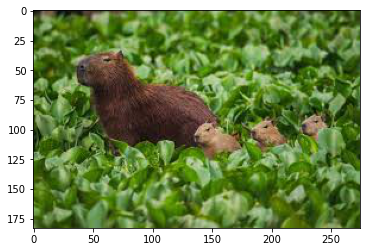

In [13]:
url ='data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFhUXGR0YGBgYGRcbGxoaGhcXGhodGB0YHSggHRolGxcXITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy0lICY1LS0vLzUtLS0vLS0tLS0tNS8tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAbAAADAAMBAQAAAAAAAAAAAAAEBQYAAgMBB//EADoQAAIBAgUCBAQEBQQCAwEAAAECEQADBAUSITFBUQYiYXETMoGRQqGx8BQjwdHhM1JichbxFYKyQ//EABkBAAMBAQEAAAAAAAAAAAAAAAECAwAEBf/EACgRAAICAgIBBQACAwEBAAAAAAABAhEDIRIxQQQTIlFhMnFCgaHBFP/aAAwDAQACEQMRAD8Ai8vyXReVW5mq3E5WRLDekGX4O5duiSQeZq3uWQLZBeIHJrzfdlJE1ma6PnOZZQ926BuByaW3MoJuEKYUbT3quTMg5I+k96GxGGQAmd+lSXrZJ8WLyk3YmvZACso1d0wTW7Y1RTW1fAUCh3ua30sdqWPq8jlXgaORpjvKfDVt7Sux3NOLPh6xbQyoO3WkGCzcI2hXlRxT+/jibRI7U79Sm6ejTyWSb2LUnpvR9jB2CmoGGpLiPLJpn4atC5JbgVH3puOtie62qbNdMuI33qmTGWVWGFG4HD2VBOkbUivYm2xclYE7etCMpYo7YOTrTNc2wttwGVImuWJwltbUld42rcZojW9I5Bpi2B/iLYJ2gUyyylpifORN4Oxwu0mqDC3ArLamQeaR4nDPaJ3271xwV46w08danHK4t2bb7GmeMqEhRS/D3Sqkcz0rfMr3nmQdqW3MyKgmADU8act3syddDbKsf8NwSBud6eZ5m4WApG46VIYGTpdwSs0y8QMjaGt/WqPlxa5GbYI62nYl5npWtxfhiF2BrmiSRIpkuXNc9hU3kk0o+AputheW4lBZ1FRI60WMvt4i1OwPpSDFYhvh/DUCAfvWYPFXLe0FZq3uNKntGbGYwAtqEXdidzTLMsO7WgscCkeBxrpcViQQTVXjMWGgztRx+QxSfZEW8ua6dJ2iicXlj2U3Ag9e1Ohath9YO/5GpzOs2a7c09AYin48QptBeWlboZG6DmvcuyCydeo6o4orL8PKbjSp60vew9ksFbUOQfSqzytKxebA81y1EGpZHpXbLbBW0zuYSNhRK4gXPnG4pNizdIIOyA7VLmpoPJvRvi8rdrQuAbdK2wuIcWGU9K2Axd1BoPkXiuQwN6dJBM8npTqWhvAt+KO1ZVB/47cHQVlNaNyidMBnKv5wIbtXJMNirh1XJ0E8elK8JZ+H5eT6U7xGZXUtgb+kioue6QtMMxaYbSqqIYdqBu5foYfiBpKjOZYneiMRjLxRQisw6kUFBN0a2E3ANJI2INJMVfMwAZNFKjT5pB9aOwVu2SZEsNxSpxgwNi/D5LdA+Ix09QOtPsNm0Wijc0Tg8K7Fm06hwT2mhruUFX6E9R0oZJqbTo3JNbFSILzRqiiv4bEYfZFLAnpTjI7dglgV3qlKj4a6DpHemh1a6BWhBlb4lkY3V0iNh1pDj8U8FdJH0r6F8ZWIB3IFRuMxLvde2AOvSlyVfJ7NVE/hmZGBneq7KfEZ2RwIOwIqTuo2o7HaicmwzPcV2+RTWb/ys3JlVbyl7zOpPlnY0OcstWnCk7Dn1rPEGeFTottG28c0rTBPp+LcYnV60XFNOkFdDDMrCMuq0hJ4pNi8pfYshAol8wNlfK2/+2nuBzVroC6ZnvUtw2K/sENyxbw3Mk8CprHX28pG3pT3G4e27tbEKRuT2rhhvDpZhocPRW3vsZS0cfDVz4jnVwBW2d+IQJtWtuhNF/8Aj+IVioSF6kHapjMsAysTBgVWMVyqqAlsoPDOPVvIwBPQ0yzRwUYEQQKE8I+HHKi6RE8TzRd7J7xumeOJPFNJV/sZ/Qhww1IAWAGrn0rTGZidLIpMcTW2ZZFdwy633Sdo4FLbbrcBG4I3B6exoONStAa3oNyjE3FuC1cMg8E9JpiuAC3I2JmZ9K9xGWu91LqrK6VmKZXV1XECpsOTHNVbUgy6TYHmecE/ybew6mmNq6luyS8Haleb4QJeKqOSI+tF5nl5GHImWAmBXO5Sb4qJvjWxdjcWAqOoG9K8WzYghF2J5rbLrwMK/E9apThbNhSVjUf3tVoLfXQV+nNv5NhUUzGzV5lWK+YetaYXEA+Y/L60Rk2KW7edgoCqsD1NZRXK0Zy3QsxuYtraGMTWU2u27MmbdZRcJ/hOzXDZdas3GDjS4HPSO4re7nWHjQw1QeYpVnNw3HJLESI+lTl8/D9anGd6iPFlXi8LYO6/iGwHekeExz2jAJBmCK4YXFRDjkdK3MO+uIE7gUH+oI3vXXvbfDJbuBzXtrKb1kSyfN6jYes8U5s+IrVu3KQDEAHknikWJzFry/ENwMsng9ulXx+l9yNyY+PCmtjS1j2tppEaedoO/qa8s3Lh862Hbkyd9vpSu3iQ0RAPHWfvXbGDWoU3blvpCMIPeQeTECqvFA7I+ngl1Y/wueIltmZVkCQsAfp0/OuOReJQwdbxAbVI2ABVuAAOxB9dxU5jkQJCF9tvMxkg9THP2obB3lBCt5pAE7GI9Z9aDVRdIbJ6eLVRVMrM1zlbbw6eUiVYUpy2xda4LllNck1xzPCXrirCFgo2YdabeCBibQZzbOjiDz7gdq5HG2meZUoupE9neKvLeNtl0g/hjn2rz+BxVsBtJCncTT3xDde7irV8AaLZggjf6068S2vjIrL03gdqecKi2tjUiIwuUm6XfVuNyT/SneAlLYt3PNqMD0FdcrjSPU8U+azaQa2AJ6TwKhGU5/hOxcmQWzqDAEx5a5WcjbTOHuw4MMrUP4hxrrftBCZYcUXex5t3UudT5bgH5GqUpLroP6TOMw1xLzF9n6+tF+G9du4zDdiIHYE03z9kvOpUgMOSeore09mzpXUPiEbmpq23RkztjMRftL57klulJ7OYoQVKgTReYYs3CSd4pJn+F+ELLL8x3I9KXg3TTByvRdZVjBAHQcV3e5LbcVMZDiNYDT5SYj1o7HYo2rmiQDyfaupdV5Ft0MfES2f4dluGARt71M5DYtr5XtAhvvFL8zzN7qsfwKYrv4axKm2SzgOp4Painyk9aKNt7KRCqALbEDt6V3w+JQyFI1DY0lzTObVm2ArAu209pqazPP3sOBbIKkfc06g/ALbZc3sbY+IUYqSO8c0Dibq/EMHbmvnIxzXHLRJYztTA4l7R3DAkcGg24vaM4lfnWW4MWWusSrNvK9/aoh8+LKEIkKdj1ii8xw13EaCqNoCge5pH/CMr6WUjfcGqwaa/Ri8w5s3USD5eoHf1pgblq1EQvYDrUoLH8OwYEgESB0NDYjHFpYnf9Ki/j0KipxGa2NRk1lSNu2SJJ5ryn4yGpG9vFOwbfcCR61mX4X4j+c7VT+F8iS0Q18BnbgHcL/mg/E+CtJpe2NOpiCBwai1SaiGMknYvuYRAXAI5236V78M201keUmKfZF4VUgPeMseEHb1PenOYYK3dQWIhQ3A9BRSdWwN2yHzHBlLSXOjNtt/xJFAYYsAYgzMCAB0n5Y/Yq/8AEWEVsJoVlm3pK6piBtExzEj618/GLKEo6MrA7SI9/eu3BK4cTpxNUjZMSw3Ox2H2/f7imGHvhgZ+bmd/6/v7ikVzFCZ5/f8A6omxjegOxG/9KZxOuMkMr12QNojfp7yD/wCtvaKAu3dwQOvTbf1HeuT3+g2HYd+f32+tcnucd/2R+v50eIXI+heDcyDSjHpydpHrVWt3cQftXxzAYwoRB54Hv/mdveqDA5zcYaS5Udljb29PSuPJGUHaWv8Apz+qxudSiO8yxAbFDV/pk6SB19/rVMcArKoTyrHmknaozJWZWLXGnfygQTseTNPMVmrKjfDWSTtJG5+9c6k7fJHOsM14Zrn+XJbta7AOsMDpHB6E0uxYuXECNs53itlzd2hX06tiWHA33H2/Suf8cC7C2rMdwX4AB369aMmuWlslkh5ZwzbA4hntOlsllA44BFcxfdixvAKw5A2/WqVQxs2RaYhigmOS3rSvFW7i4i0uIAP/AGAkg+vaaScZNcditKqFQw17ESLFokAfNwPoT1ozCeFLYAbEX9D9pG3pvVkmPtoy2ta6m3VR19ornnq2iuprauy78bj608cKhH4+ApJIU4fLLek/BbXty2wn0NKMXg2e5N1lWBHoB705GPkdAOgHAFMMqvq9ubmmODqjf71OC5r6Mqb0JmtWbNkAKCYkEE/etMw8NPd0YgPqdlEhtgBHSKJz6zYfzfEAA20rpPFe2c3BdVXVpAA370bfNqT/AKoF8WyUveHMSA0oYnpx7ihMFl1y75RYI3+baIr6fi2aDpEmPSJ9alnslLmq5qRHEHQZG/t1FWeT2/Og9C+z4LDaviXAh2iPN96ls1yZrdxYl7ZMKe4r6LatWhbP8wuu+4+b69an8d4evF9YYfC5TUeJ5EVV5XVxNyaFeCsqjoI0AkSY3ANGYbGqbhR4dZIGrcjfY0PbZQ7LdBJXyqZI69O9HtdsorstvUzACSY0kDma4nXnsWrZSvft2FVehMKB096mvE2HNzUxWG5U94pBevO5My2nfZjAo7D464bLrq2UAqSNxuAYPberNy00PWrNM1e49izAhhtB7UoCPMOIjpTFcymBdQ/9kj9D1p1l2UhyLlpybO4f4gAYRB09t+9FOS06MmLMNh5UHQaymWIzWGIUSo2Ecbdqyj7j+xL/AAGs5y6wSGZZ1S+23p6UDnWLFwBmJAMlI6MDH6aT9arcSLVxAr6WJOyEjodth+lLPE+SrqhRptuRwP8ATubAGP8Aa0wfvRjUn2O9hfhTPFuOEadSrIjeYG/tTTFeJLNth8MhwfmIEwev/L9f6Uo8DZMLbvcDFjGkdARM7D6CufijA2hL2xB5IHBncmOhpZWv4mTpaOWd5+DdGldSLG0wCZ3/ALUzwWOtYklTbgxq0sAQAeCDxUHiMYIIA3J57Aflv/Si8mR2LFWIhSZ7xwPvFDg0uRnGhRnqgXDpAjrHG37/ACoWxcI7cj9/rRmYHUJj8qFtW69SD+KO6KCLJ3Haf6f2ry4T26Qa727Mc88j9+1bph9ySd+fzNay1Ojhh1EwfUT94P5flTTL7fmhjE9edz78z96A4ECJB/P19DH7mvFxoIk+x7x+59eKWSbDFpFHcugCCYgxI3B+hJIMdOKyyxPBEdvTuKRWcWSZ68SOvae4ojDYqORuOnT6H9/2CjRRzsduJILTPbcfbea3a6yrKBjPaPyAoS1iJ7+nUHrHv9vrXWeqkr3AO3rM0tBdNbHOC8QBFKsNJMb8lR1gEAn86Ix2TnFOt1cR8RDEgA6go2IMcGenrU/oYyTBHVWE/Y8xReBzFrLarcg8Mp3n/qealPCmtHJl9LFq4hF7FhSmu4q3LFyVgN8o2KnbaRVXk+L1q13bQ26z7QR96mM5zO06Le0Bi2x1DkrIn6UZlmYs1ptUBVWVCgADf0rmjkluzzno7Y/Bm02rYiJjtJ/QVP5tmLXm0M6rIheiz0BjvxJ70V4i8QawFUcCCZ5/xUubYfdxclvl0gfTc81GucvwFUbWsM6OVdSjCBDbHciqg4Z7AElSWAKgGTPMmu2Un4yqmJt6ihARjIuA9A0crS3xRjIuNpXSFXSNyf1pZrktd9DcfLG9rE3CFJBIYQT332O3Sg7uNuWW1AyOoNe5ZnFtbNtXmdEMRvpI7gbwRvNLMxzBILGSI3gHmq+0vvYJWHnNkMm4sGdnQwR9OCKf4d1e15iQGiH239q+Wi87kRTzA/EULqY6ZmJ4/cVoYqe9mSoJzfI71pjcbzJPzDcx7dKZ5HgDcsOAx0XPKRtyOoP1/KhcyzliAdR0wAR0NC4rN71thphU5ULGmPpzTRSUr+jN10E5d4QvWhd2lyALbBoHO594oPOMtuWURLhBLE7DciPWPWn9vxIRYF64IUtpnsQJit1Jvab1yCOUUbgepPeqySkrTD2Rd7AXLbgXFidx2NUGHwiXhpYlURdTqrQCT8sjrwTRXiLFImGZnifwDrq6RUDhMwu22DgkapE9GHUEUvBt2bj5LnBOAgELtI3Hqa8pbh01KrEgSB+KPyrKb2xaZ3xWS3Ef41ohvxFRzI5I6bneKKx+eG/bB0w8QenaTv6VvkTA4EBT5gSfZpn9D+ddcFmBcm3cAYeo2PvS8X3ZRoK8O4sICP8AjQGcXlVTcdgu+09fYDc0M95LTlRKiCRJnpxS3NWtshdvnYKtsE7mQCx9FUT9a1J0iavoU5oq3CLltdKSeQAxkzJjpuQB0AFdnxvwbSIu7lST6SeTRNm2PhQxAXUFII55O0bzMcetMk8NoUDJKO/OoatPuCZmnTT76HVsm7in4IPEH+lA2Hg8T0qkxNoW3dbjgqggBfxMB8oHQAmSen1qcfymI36V04ZOS2dmGTrYZcvHY+8/SP6k14XAX14/f76jtQiFu/pXW40j9/vtVUdF2cb7EmQeR+/71xXkz1rsR06xx+/3vXMkc8+lEU72QB++vp+tGi5PaTx+/p9eaUdx02I/fsa7Lfjjef1H6f4rUMpDJMSRsDz/AHP+aNw2O6RPUQJ6D9/WkXxd4P0966/H/wAR1/zWoPIp0dTsABtPcGe2/FeiOOk/Uff99uKn7F5wdQ3HrtFM8NjtXTzSBH0470vEdSsYXEGkqerAq07Anbf0I/T3o65eRUNpTMfOR19BQdzB3QQptPBWSdLAAGDBJ2G0T6/WuVoRfFspwJUySBtvz+nSuT1Mfg2tHH6nCn80EYLLVxDxpMDdoJ46D60NicXpLWbACW7Zl37GY55k9hVFhdFmxrtudRaWmILaVmD28w+xqAzW+zaLIHBl/wDlcY7kn02Fc+LEnGrOLi7HOA8QvqEaipYa2/EREATGyjr3oTOswJuMHAKniNtum9c7OV3PhhVUfE3JUkBtvQ+8fSmGTZS9zyXrZJ7do6z0FGbjB/8Ank1CR8crQN1YCFZefY967fG0hYJ8wPPcHf8ApVIvgoIjDWmpmO7aiVXppgfN96QOLcCVaEJG49YJIB9NhVXC0vou8Moq2Mjgk027gfQSgLDSDIPYzt0pZg2ZLbKXLEMTtxB7TvMztTRyAkgA2R2/DPJHbflaW/wZDLBlWIhh6kUt8deCCewzE3baW1V3AJEn0Jqflyym2zaPlOxhT0ntJqwyfIkY3GuuAjgoB+JgHBkT8o8vNN8TbS0nw7eHZk2AVUUiSQJfUd/+xmrRjo6Mfp734IrF2XFnTdkKW1bHYH5ZPQbj86q8vxqfBB+VLawZ9NhHeYpX4twFwK76SUOkQoEKeoIHC7T7mleXYS7cw7qscgGTACAFjPsSDSNcUti5MSj8QTNsw/ibwG4A2UdAOST613vwQDzv+YkTXC3g4OlASx2mNz++1dcVl721XqSfl/EPp96RyU2qJphaZnpAAAAAiIFZSNrprKPy+zUhvkedaG+H+B5A9GX+6kfYU7w92Lg9ajcHhTcVCvlAuc+gVST9ytVOMxyAKEUuRBkyN4j67yelNklGDo0h9mWCS2gvtDvxGxAEcR1PrSuzlVq88mFXSANIAKmQSRO25n70BezbWpU7Qev25rzJc1XWyNI6T02IPP75qUbabAM8dl1sPbW2x0BZP+4tJBJbniOIpDjs5uhzbtPywVVVRPQAA9J/rXfF3dC3fhvqMhQeRLAnb6A108NZGpK3mMuCG9AefrVuSjG2MtE8Uua5uKQxnSCCJjeFnmfzPet71mVDwdtt6scytaSyND2m3KkzE8exmancx12Ityr27klSfmgGIY+k8+1NDKm9DYp/ITl+PStzcn8j6f8AqjDgFb5LgDD8LgiD6FZB+sVpcwDqJK7d5BH1IkfsVdZI3VnZzXVi6/dJjbcAD7VwD+vrReJUAT+4rhbwFxz5UMGIJgDf35+lUcklsEnRy1d63HX99Ky/h2Q6XEH8j6g8Ee1OMF4YxFxPiABU2gsQOeJAk7+1ZyjV2DkltictXfBnfv6UzzXwviLCl2VSgEl0YMI7gfNHrFKLW1ZNPoKkn0Hu+5/f1r6T4QyYWVD3FBvMJ/5KIMATuDG5/wC0dK+X2bmkqexBn09PtVvkOaQ9wvf17mCSsxvuNuu32pMl8dFYy2U99rtxnt3ECWdMbtqLyd5/2wI6kzXFsisC3J1EwDqGzCOZgkEGe3Br3AY1LhADEgck9PvTK+6gDRxXI9qh5wUo0RF3E3UtoGgnXcUbRqB06duOBSrHXfhuU8u7cDfqYmO8fWrfMUV1hxPv09QeQajcwwItkaUGjUrTIksvQk8ncn71F412zkl6VRi22EYXHm1eVmUPPl1R5wOIMfMPzquybObNwMLQKgEyTOrid5H6UgyzKbd69K3Aqgq4YwZOxIAJmQ01wv2b2DkhQbbNIZSZjfZl5HPO4p8NSW/5A9PKPLfY+xOHU3fiG87gAgJI0AmN4UAz7k0oz3L0uWm0J/MB1iDudoMjg7D0699zsJmZdSxAVRB3I6kbexkb0Vexlskgfh5/we/p+dM7s7WoSi4nyzziYJAJgwSPvFPPDeYLaYpd3RoPqCOo/fSmGKwQuXJWBM9gphS2/rsaEweQMxd/Kfhr8QnfeV2A9fmP/wBaMppaPLyY3B0wqwba4tW1BQygiWPUQQZ9QaqlxoMKjBzMR6bdKmykoob+YsFirAHTxJQ8jbt/t+zDKsOlplKDZt1JJJntJPNTXq4yai/6/Dow54/xeh1mLKqFD5tUhuI425kT60tynJLWgwSQNU6iROuJnRA6ADbaK8zOYJozKL0WWp5vdHG8kpv5Mk84tCzeCoGSRv5jBE7R6SPyrMNYAAZGK3F3HY8jr1orxXZLIH/2nc+h/wAxSEYzTGowY6bxXM4t7iKjq+HLEsUkkkkgHczvxXlNbPisINKIdI46bTtO/NZVVD7Y1MVYLBXUtS6OirK+ZSJLN6+gH2FeW1ZiAF32226e9VmMxmHt22RmNyei8yNpniY6ztFcfD2BDqbwGgNIUE6iADG3HWhNcncdgvyTWJyxrf8AqEAnfSJJ9JgR9qLyHIr19ioXSu51tIUhlIlT+LftVTfyS0+7FtWqSTHmHaOgp2+Nt2lABEtsq9T9KdOUU7DFojcXkduwmgkuQ2qTtJ0xwOkT35NB4bMfhh9AMwSqc7jgT/eiPE2NIJnYn8u/14pVlmXveUuSERY3PXcAwOoH9I9pRlOe30BNh2CvB7PlIN5oe4LgiJIBAYeukAAEwBXLxRgWYWmUTpLKe4YiYIPcKTTnw6La3Db3BedN0bM3WGncT/xih86yxiRomUJIiT0g7TzApnkUGmHlsmcVh3V99IIMNOw3Ej6xVNkOG1XNLcDc9ivp6GhcpyX+KuEXywAAMiATA/FIIO23E05wDJD2rSmLXDs0vEgbgADTv9PtTzUcqi3/ALGySUla7FmI8O4c3JV9DSdKEEp6HuPrNA4jAXVu6XBDdI6g7SD1FOMMGF1dg7cgdz296f4wtirUaArpujKfuCD0I9e1TyS5f34E5OXbIk4BXJVoKwOTAnp7GdtqsvDFoRdQkHSR7SJmPrUzbwo1NbYHYwTsTPI2kDnimuXZwRiTaJ3KqAe5VFkekGdvpUsUnZkc86/076bfKyieJYEf1qJw+BgwoDN/yAgfQz/WnniXHEsLSAs7mSBuewED6/at8Blxtp/N2YnU3UgRsPf+9UeSWOH9hjJxjoXYXIgQdRLH0IUA+mxn8q8TKwPJO3rEzHQj9Kv8L4dX4AcFjK6tMjtt0pbj8jYILn4Op6r7/wB6V5/URdy67G92adiXA2jbG7GB0/fFUtjGgW5JAA6kgUuvZVcYLoBYsurbpQWJwz24W7aYCZncdON9ukzVcmbjTXk7pepioriNnzRW5YAsJWTufatLuSXbttldQLbDczB9xE7g77xWZPhLYvC40NA8ix1JO/YkbR71S4u8umbjaB1MjYdhRxZVKNshL1baokMXYFnQdijAL/8AZQBv2kfpWYpNYkMeIEmRHY0bm2IS5hiqoyqTqtz8zH/d7ET96S5Utx5UA+/QbjrXLlg4TU4PZyKUovkjpYwYEAfEluij7zI4706yzD2kTjVPOr9IET9aaYLCXEVRcYeVf/5yNo/EWmTPtS3xCVVrd5DpaYZY2eOduNVdatPmyuTLKTtOgm3ZYzFsfCYadIUAe8Dr615hMEtjUA8agAAY2CliJ9RqI9oonK8y1hBIIn7giufiu0Bpbg00pKuRO3VkxjbBtuVXjpHZhwPzFNcNZV8LAMkb7bkb/qDXC0yElGKkN2MwY/Ki2sW7FvSphSNRJ/U15/txzN+PP/QJ1dnlyyRbOuNh0PI6/lXDB3f5LaTIpbnmPD4a5obpGx6SOaX5RdcYdhbEBjuTvp/6j+9ehOSSs0UvIbmuaMEe0eWXb05BmpK7bIHmG547fem2PQ27i6nDkrGrj6R7Vlog+UiQf2P7VK3AIut2CRWV7ey29qMHadvNH5VlWuL8oYKxDk8dqo8nz20mGFtt2UkCOSGPA9QSaSpZQmC0H2mgrSaHkjg1DHLRqpF9leJa4wVyoJmBMt6Anjavb1q3ZuXDcQ6oLBgSZEeYRMUhyHEj4ytxB61TeI8QrJq7D9aZtNWBC7BPYut/DlBcBlxqGo6iZjUTPH/56zXbG5bO+rSgI1cAhQp4/L2pdkZT/WXYqCJjae/9K3zQ3XHxDunp09x/Wkc5KF0BsDxuKVbgdSSVIIgdjXcZojk3Bqmd1YDTx0pPib8D1Ow+tUGA8OIyRcLAlSABsA5PzT1HIipQxuapgO2TXVuB3n4QO1sAggwCD8248wH50wyjKTb1EHa5r3bncACRHB0gz6DpU/gcXbQfBcK5Uldj5I1T9aYWM0KX2PNn5Y6RH4apUYxpOgxlvZr/ABWl7bKo1DykCZMOZYg9V2npRF7O0sl9MtJJAHf19KDxmK+IrNbXQpPfzEcc9tht6Uixd0D7ECo+5b4x8Af0eJnBuXDqB1EmWGn6bRG3Q8/rR13BujWsSsfNAGmNJCzvvBmTQWW4FghYjc9ad+FMCbh/mEm2rbDvTOrfH+h0zjhLjW3JLhSw8xHMdpArLmP1PoAmROokx+/emmYlL+INkRa9/T2qczDDHDXdDFTO4IPepP08m7kCSKzBZusIl2YQiCONthqA5in2KvBrZVWA1AiYkEEVBWL+pY61QZFdJTQenHtVPTZnftyEUn0c7bXMP8LUwaNSyOqmCPqK6eJ73xEDqPl5J4IO/wC/aiM9VfhqpIBLiO/B2FKzjlVCjmZBG29dc3FR4tgTa0ZkOMs27bO7AtMjrHtS7O82s3CFZrmnnyaYn1J4+3WlN29onSAR0J/tXHDYo7jYfSf2K5VKTW+imijx2apftBFQAKIEyQB2Eew+woR8YRbVVOkn5jMsx+nAjaKXZWhLQWgHk9hVXjLNgWfJ8wHPU0kubtt9CijCeKbtr+Xc86nafxD+4r21m7m6yEq6NuqlZggECSeI5rjiXQpqMBgYJ6kRQmBvqt1SBqAUz9apDI+jJ+RrisebbKxiYJAGw24FLblxrja7jFmPf+npRV65bvaQx0AEktxAjrJ+1EZXmtpTdIhVRSEETJOwk9TRmufTBVgGKtgjcRtI9prjh8W7aLclhJBmDt9elG/xxVPlmRydz9uIpTZxCq6oomTuevtHQTU8K2Gl4HN7w2LY87iXMKqjme/pRWTZQtqyVYljqniIgnb1r3F59bQ2zc3bYd4A6/en1h1dQ44InfauylK0HZNf/JLcYhratbB0gMARPJ5r3Ncr+Iuu3bCuo2C8MO0dD2NHYz4a2rpCK3mB9iev5ChcBj9wusSed99q1JLixW2KlW7HyN9jXtV9wiaypf8AyxBbJjLEQKJWGiCSKAx2GkwnmM7R+lE4HHfeI3oO/eOqQYM8ioKTvZQFts1thrUr2kEUyvNduo2n5QN2PAnitrePLEMw1R820imOLv21QW7YCq0MQOtdL4xjyQOhThL/AMJRb1wG2M8A1WK4/hwNjA6V8/zqWBI4UyfavMFfaBDEek0Fft2Gk1ZbYx7PkZLaERBECVPqKcWT8TDtq222I2IntUBbefxEfrVI2MItKIcR16Ggs8UvloHTsnb2TMlwASVJHmA4kxvTnPLhfTYs2zsI2HTuT++azDY8NcAIkdqd4vNNKFQAKWCU9vpATQjvquHQLdBMrC6eppTlCC4zllJ6L6EmqTLQmKNxroDKoCKO3UketdMILa3AiqAq7k9z60s8SgqXkxpadLcBlkDc1ywed3GvkqoCcARx617m1piCUUsO4ozwvhk+EzuKtGChpeDJNiHxHhLquW3BbcH/ADSnLsoN64PiXIHLcliPQmrHOcxDD5YA4mo7GXiG1TvzUcebnOo9DJrodeHsKgu3PhyH4AbsPXvW+AxV3DXT8ZDo3g/0mgckxwBR+pmfatc1xhcHcmDIFXnqPWwM2xWZtfugngTA6CuTv06kxW+Q5bcuS4HkH4ulVmW+GrWkXGBc8wTArm9uUpAUdky+FZSyMhJI22nbuKnbilGIIIr6fh8e51hrOgjjbp71wxGR22t62HmnnrVMcNWijij5xaxPmiY70y/jiIXpRmc5Wq7EDf5WqdW045GxMA+1GMVO/BOkzvjMUSIHeu2Uai4AUlm2HtQYTeO+1PcqdLRDQSwEaux9K0+MVxHjG0cL2DbUdalVB67b0RleTviWJHltqef6DuaNuYf+KMl4IM/TrVRg7iW0KAgaR8o7U+LCm7fRkiQ8SZebDJoJKsOvcUASDbaEHxDHm3HFOfF2apCqDLTtHTvS60YWR9aTNUHaWgNCvLbQH8x9yDsD6VW384RbBdj5m2Udduam30jniZpFjsUWaOkwPQVXEnLaN2PrFy5dV3LaLe/1NcGyq4FFxU2n5gea3wl8HDhR0MH71SZSAcMy9txRlEGyX/8AIsSvl1cbbjf61lMWtAmWQE969peX4azvmOBZWZmUCfxLwfpSK7e8xinmYZyHBXcT3re1kiAByQ2oT7VKEFbMv0HfL75tpctCQUAMcmPSl73HA8ykEbbirPKMZsRAhdgPSuOaZ7ZtgyAx6DmqvHGqC6EuV5KtxSS86huPSlmOy/4J8oMd+RRvh3N/5hLbAtx2mmAtziCp3Xn0NPJfGgW0D5JlRI+Lc46CnNnGD4dxHA23FdLr7QKns5unSwXk7bUHFVxQqbkzMKwN5SCIovOrxAJ6UkwGGZYESfXvVIt1wvw3w63B6VzwfF8VtDOKEfh/FsrkL+L971UWcrJRytwM5HAqazVrQgW7TWjO4onK79zDvrJGlhHO/tVeCk+Q2hvkGb6JRz6b0RmOep8qgb1K3sRFwz1M11xSBkJHI3rmySkvhLoVtrQwv3A3J27VyxWJUhgFRZGmYnal+DR2APA7nii2yS7c2BWCeZqePDKMlQI3ehXlt1VYoQJGwP8AanWT5eTiE0gMvJB4ivcV4OCp8QXpYcyNvpRmTtdtAEWyZ6nt6V05JSjJPx5L1fY8zDEi3aIACrwANqW5fjiyqsml2eY03GiCsdDS6xj/AIew5O1b3VLpkpXZ9Aw+KBQhj6TXLH3QLUA0qwjeTTMzQua44W4UtTxbehk9AOduSoHJnb613wmQP8HS1sFmOrUTuvoK4WM7t/GVVXXPX/bVXhs3QsEBGqNwOnvTRxL/ACAnR8/xOSXkvBQhM8EcUXbESpG/H1qvc6nmY01KZva87uO80ufDyjo0WwJbrW21IY6UsfE3FdjqMnrRFlndtKgk0SAEIJUEjv0qUG4aY62C3Roi43znj0+la4PGkz6mszXHG4s6QN+RzS/DIR71dx5QdiNbKvA4a2yMX322qdxGTRdl20qTtG//AKqiwlvRb35j7UqxAdlIVSfNJ9BS4OUU0Bdm92zYsJCks78CeB3MVxxGNKqqq/G7AdT60C6afQ13wWGkFmG1NKWjVQTbZmAMnevK5HMz+EAL0rK3J/RgzN8OUaOYroM5m3EbisrKYahPbzBwWhiNXNatYYjUTNeVlLkfF6DRxwbsp461W4LEBtJ68V7WV0NasE0NX4pXADEt3rKypyXxROC2KMwzH+YFURG9VWR4mWB71lZStVVDzSCPFFtDEqN6QYO0HuoDJIOwPAr2sqOSck9MHk88Y5eqksshuT2pFhscdJB7VlZT1zXyHqzvYxDOugHaireYupFsH69h6VlZTJ/OhuKSsq8Njf5IQck9acWb0Rq4ArKyqx6s1Xs4thbV0k6eaj/EGTiy6lTtMxWVlSmlw5VsWtGzZ0EGwJNAY+811XLICeeePavKytF2KlSBMHbe2pdQJIgcbVQ5Fg3tWS5iX3nr9aysrJt9iy6ArmZstxpJgdPWluLzBipE8nesrKsisV8R7hba2rIA+Zt2P9KXX6ysryeTc3Zm6YJftAqBwe9aZXhSbsHpvWVldWFvoD2Vv/x2pOYHJNdLOVrbB0sd+9ZWVSD7DSSRM57k7i4sEFW6/rXubOFTQo2AivKyj32JLsSLEVlZWU1GP//Z'
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

<

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The **width_shift_range** and **height_shift_range** arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


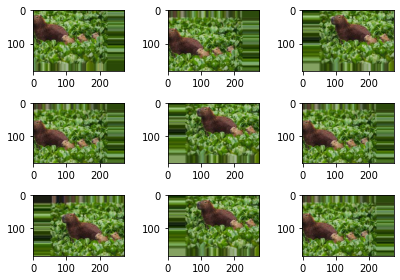

In [56]:
#We convert the image to an arrangement
data = img_to_array(img)
#we expand to a sample
samples = expand_dims(data, 0)
#We create the data augmenter using only makeover
datagen = ImageDataGenerator(width_shift_range=[-50,50],height_shift_range=[-20,20])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and display the results
for i in range(9):
	plt.subplot(330 + 1 + i)
	#batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') #is converted to a valid value so that it can be displayed as an image
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The magnification is specified by a Boolean argument ** horizontal_flip ** or ** vertical_flip ** for the ** ImageDataGenerator ** class.

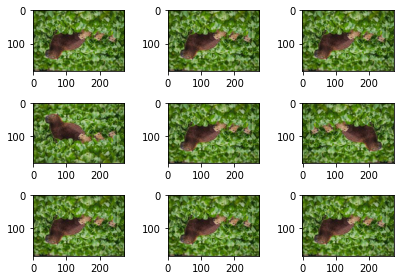

In [5]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]

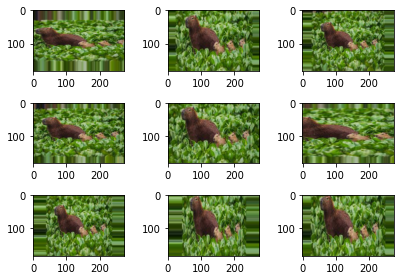

In [6]:
datagen = ImageDataGenerator(zoom_range=.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
 
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

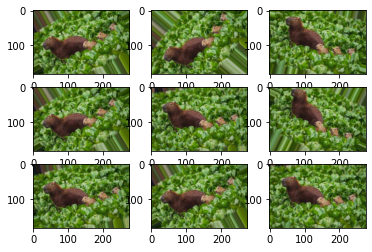

In [7]:
datagen = ImageDataGenerator(rotation_range=50)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The amount of bright is sampled uniformly at random from.


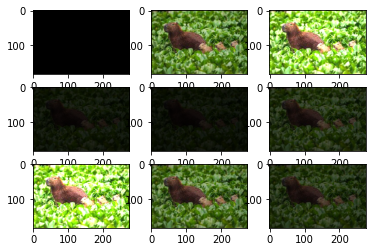

In [58]:
datagen = ImageDataGenerator(brightness_range=(-.1,2))
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.


              featurewise_center: Boolean, set the mean of each element to zero of all data.
              samplewise_center **: Boolean, set the mean of each sample to zero
              featurewise_std_normalization: Boolean, Divide the inputs by the standard deviation (std.) of the data set, based on the characteristics.
              samplewise_std_normalization: Boolean, divide each data by its std.
              zca_epsilon: The default is 1e-6.
              zca_whitening: Boolean, indicates if ZCA whitening is applied.      

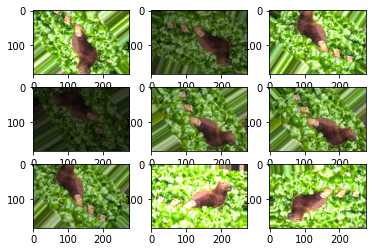

In [59]:
datagen = ImageDataGenerator(
            rotation_range               = 60,      
            width_shift_range            = [10,10],   
            height_shift_range           = [10,10],  
            horizontal_flip              = True,   
            vertical_flip                = True,
            brightness_range=(-.1,2))  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330+1+i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()


Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will start by analyzing the following:


1. Text Attack
2. Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [18]:
!pip install textattack

     |████████████████████████████████| 327kB 4.5MB/s 
     |████████████████████████████████| 102kB 9.0MB/s 
     |████████████████████████████████| 686kB 14.4MB/s 
     |████████████████████████████████| 245kB 23.7MB/s 
     |████████████████████████████████| 153kB 27.0MB/s 
     |████████████████████████████████| 235kB 25.2MB/s 
     |████████████████████████████████| 778kB 16.4MB/s 
     |████████████████████████████████| 1.7MB 50.1MB/s 
     |████████████████████████████████| 1.1MB 48.0MB/s 
     |████████████████████████████████| 317kB 51.9MB/s 
     |████████████████████████████████| 3.0MB 57.9MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 204kB 54.0MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 19.7MB 1.3MB/s 
     |████████████████████████████████| 798kB 45.6MB/s 
     |████████████████████████████████| 276kB 53.3MB/s 


In [19]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-16 16:39:16 INFO: Downloading default packages for language: en (English)...
2020-10-16 16:40:35 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [21]:
text = "Who wants a piece of the champ?!"



Text Attack provides us with four methods for data augmentation.


## WordNetAugmenter
Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.





In [22]:
aug = WordNetAugmenter();
aug.augment(text)

['Who neediness a piece of the champ?!']


## EmbeddingAugmenter
 Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.


In [25]:
aug = EmbeddingAugmenter();
aug.augment(text)

['Who wants a slice of the champ?!']

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.

In [26]:
aug = CharSwapAugmenter()
aug.augment(text)

['Who watns a piece of the champ?!']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [27]:

aug = EasyDataAugmenter()
aug.augment(text)


['piece wants a Who of the champ?!',
 'Who wants angstrom a piece of the champ?!',
 'WHO wants a piece of the champ?!',
 'Who a piece of the champ?!']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the ** translate () ** method are:



1. ** src **: source language. this parameter is optional as ** googletrans ** will detect it.
2. ** dest **: target language. Mandatory parameter.

1. ** text **: the text to be translated from the source language to the target language. Mandatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

The supported languages ​​can be consulted at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.




Some examples of languages:


* Afrikaans 'af'

* Chinese (simplified) 'zh-CN or zh'

* Esperanto 'eo'

* Japanese 'ja'
* Latin 'la'


* Spanish 'es'


* Turkmen 'tk'


* Yiddish 'yi'

* Zulu 'zu'





In [28]:
!pip install googletrans

     |████████████████████████████████| 61kB 3.9MB/s 
     |████████████████████████████████| 972kB 8.2MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 102kB 7.9MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=51f016f5dde207180aea7199c909241bcfe8076dfafa542d94ce36d5f663a636
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=045a11da77f1b74939da71c5589fcb79814fb57b8b13c2a491e3a8dcbde4532a
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [29]:
from googletrans import Translator
translator = Translator()

In [35]:
origin_text = "ブラザーやめてください"
text_trans = translator.translate(text=origin_text, dest='es').text
final=translator.translate(text=text_trans, dest='ja').text
print(origin_text)
print(text_trans)
print(final)

ブラザーやめてください
Por favor detén hermano
兄弟を止めてください


In [39]:
origin_text = "Imagine if I had a real weapon!"
text_trans = translator.translate(text=origin_text, dest='la').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Imagine if I had a real weapon!
Quod verum cogitet si telum!
That is true if you imagine a weapon!


In [37]:
origin_text = "Va por ti, chico."
text_trans = translator.translate(text=origin_text, dest='en').text
final=translator.translate(text=text_trans, dest='es').text
print(origin_text)
print(text_trans)
print(final)

Va por ti, chico.
It's for you, boy.
Es para ti, chico.
